# Task 1: API ที่นำมาใช้

There are many variations of passages of Lorem Ipsum available, but the majority have suffered alteration in some form, by injected humour, or randomised words which don't look even slightly believable. If you are going to use a passage of Lorem Ipsum, you need to be sure there isn't anything embarrassing hidden in the middle of text. All the Lorem Ipsum generators on the Internet tend to repeat predefined chunks as necessary, making this the first true generator on the Internet. It uses a dictionary of over 200 Latin words, combined with a handful of model sentence structures, to generate Lorem Ipsum which look

## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import urllib.request
import json
import csv
from datetime import datetime
import numpy as np

In [ ]:
api_key = "Y8DPWYVlNC4668nI7DjJS3GSmQR4ZcVR"

# Task 2: รวบรวมข้อมูลจาก API

In [ ]:
def find_dept_code(dept_name, api_key):
  url = f"https://opend.data.go.th/govspending/egpdepartment?api-key={api_key}&limit=10&dept_name={dept_name}"
  response = requests.get(url)
  data = response.json()

  bkk_code = ''
  for i in data['result']:
    if i['dept_name'] == 'กรุงเทพมหานคร':
      bkk_code = i['dept_code']
      break

  return bkk_code

def get_raw_data(limit, api_key, year, dept_code):
  url = f"https://opend.data.go.th/govspending/cgdcontract?api-key={api_key}&year={year}&limit={limit}&dept_code={dept_code}"
  response = requests.get(url)
  data = response.json()
  data = data['result']

  for i in data: # extract and merge "contract" to same dict
    i.update(i['contract'][0])
    del i['contract']

  return data

def write_to_csv(file_path, heading, rows):
  with open(file_path, 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=heading)
    writer.writeheader()
    writer.writerows(rows)  


# Task 3: Parse the data to .csv format

In [ ]:
# Create a blank csv file
!mkdir data
!cd data && touch bkk_CGDContract_data.csv

In [ ]:
# Query เพื่อหา dept_code ของ "กรุงเทพมหานคร"
bkk_dept_code = find_dept_code("กรุงเทพมหานคร", api_key)

# ดึงข้อมูลจากหน่วยงาน "กรุงเทพมหานคร" จากปี พ.ศ. 2560 - 2564 ปีละ 500 objects รวมเป็น 1000 objects
raw_data = []
for year in range(2558, 2565):
  raw_data += get_raw_data(400, api_key, year, bkk_dept_code)

In [ ]:
# Get all heading from dict keys
heading = list(raw_data[0].keys())
heading

['project_id',
 'project_name',
 'project_type_name',
 'dept_name',
 'dept_sub_name',
 'purchase_method_name',
 'purchase_method_group_name',
 'announce_date',
 'project_money',
 'price_build',
 'sum_price_agree',
 'budget_year',
 'transaction_date',
 'province',
 'district',
 'subdistrict',
 'project_status',
 'project_location',
 'geom',
 'winner_tin',
 'winner',
 'contract_no',
 'contract_date',
 'contract_finish_date',
 'price_agree',
 'status']

In [ ]:
write_to_csv('/content/data/bkk_CGDContract_data.csv', heading, raw_data)

# Task 4: Load Data and Pre-processing

In [2]:
df = pd.read_csv('bkk_CGDContract_data.csv', encoding='utf8')
df

,project_id,project_name,project_type_name,dept_name,dept_sub_name,purchase_method_name,purchase_method_group_name,announce_date,project_money,price_build,...,project_status,project_location,geom,winner_tin,winner,contract_no,contract_date,contract_finish_date,price_agree,status
0,57085094977,ประกวดราคาจ้างเหมาเอกชนขนมูลฝอยจากศูนย์กำจัดมู...,จ้างทำของ/จ้างเหมาบริการ,กรุงเทพมหานคร,กองกำจัดมูลฝอย สำนักสิ่งแวดล้อม,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,27 ส.ค. 57,"4,455,190,000","4,480,010,000",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0735525000192,บริษัท วัสดุภัณฑ์ธุรกิจ จำกัด,สสล. 1/2558,13 ต.ค. 57,4 พ.ย. 67,"4,436,575,000",ระหว่างดำเนินการ
1,57055187213,ประกวดราคาเช่าเช่ารถบรรทุกน้ำอเนกประสงค์ ระยะท...,เช่า,กรุงเทพมหานคร,สำนักงานสวนสาธารณะ สำนักสิ่งแวดล้อม กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,29 ก.ค. 57,"1,377,660,460","1,377,660,460",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0105528040905,บริษัท อิทธิพรอิมปอร์ต จำกัด,สสล.3/2558,22 ต.ค. 57,1 ม.ค. 66,"1,372,035,060",ระหว่างดำเนินการ
2,57055063869,ประกวดราคาซื้อโครงการจัดหาเครื่องมือหนักสำหรับ...,ซื้อ,กรุงเทพมหานคร,สำนักการโยธา กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,10 พ.ย. 57,"1,000,000,000","1,000,000,000",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0105556183774,บริษัท วีก้า อินเตอร์เทรด จำกัด,สนย.10/2558,15 ก.ค. 58,9 ก.ค. 59,"993,200,000",ระหว่างดำเนินการ
3,58185000059,ประกวดราคาจ้างโครงการก่อสร้างถนนศรีนครินทร์ - ...,จ้างก่อสร้าง,กรุงเทพมหานคร,สำนักการโยธา กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,1 ม.ค. 44,"934,800,000","934,800,000",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0993000328485,กิจการร่วมค้า KRR - KRC JV,สนย.51/2558,23 ก.ค. 58,-,"934,800,000",ระหว่างดำเนินการ
4,58185000047,ประกวดราคาจ้างโครงการก่อสร้างถนนศรีนครินทร์ - ...,จ้างก่อสร้าง,กรุงเทพมหานคร,สำนักการโยธา กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,1 ม.ค. 44,"885,700,000","885,700,000",...,ระหว่างดำเนินการ,"{'lat': 13.7780980259196, 'lon': 100.565063509...",POINT(100.56506350980077 13.778098025919627),0105497000257,บริษัท สหการวิศวกร จำกัด,สนย.48/2558,20 ก.ค. 58,-,"885,700,000",ระหว่างดำเนินการ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,63127340142,ซื้อจัดซื้ออาหารเสริม (นม) ยู.เอช.ที บรรจุกล่อ...,ซื้อ,กรุงเทพมหานคร,สำนักงานเขตมีนบุรี,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,-,"6,492,266","6,492,266",...,ระหว่างดำเนินการ,"{'lat': 0, 'lon': 0}",NaN,0994000237545,สหกรณ์โคนมไทยมิลค์ จำกัด,11-15-64,27 พ.ย. 63,14 มี.ค. 64,"6,492,266",ระหว่างดำเนินการ
2796,63107041439,ประกวดราคาจ้างก่อสร้างปรับปรุงโรงเรียนวัดปลูกศ...,จ้างก่อสร้าง,กรุงเทพมหานคร,สำนักงานเขตลาดกระบัง,ประกวดราคาอิเล็กทรอนิกส์ (e-bidding),วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,28 ธ.ค. 63,"7,485,000","7,455,079",...,ระหว่างดำเนินการ,"{'lat': 13.7270453005107, 'lon': 100.768167972...",POINT(100.7681679725647 13.727045300510657),0105542057844,บริษัท อีเทอร์นิตี้ คอนสตรัคชั่น จำกัด,15/2564,22 มี.ค. 64,20 ก.ค. 64,"6,489,200",ระหว่างดำเนินการ
2797,63117202387,ประกวดราคาซื้อเครื่องตรวจสอบเปอร์เซ็นต์ทอง 16 ...,ซื้อ,กรุงเทพมหานคร,สำนักงานสถานธนานุบาลกรุงเทพมหานคร,ประกวดราคาอิเล็กทรอนิกส์ (e-bidding),วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,14 ธ.ค. 63,"6,505,600","6,505,600",...,ระหว่างดำเนินการ,"{'lat': 0, 'lon': 0}",NaN,0105536062661,บริษัท ควอลิตี้ รีพอร์ท จำกัด,3/2564,29 มี.ค. 64,28 พ.ค. 64,"6,432,000",ระหว่างดำเนินการ
2798,63127027453,ซื้อยา Losartan potassium tablets ๕๐ mg 

In [3]:
# Replace "-" to null 
df = df.replace({'-': None})

In [4]:
# Parse Thai date to general date
def convert_thai_date(value):
  if value == None:
    return None

  value = value.split(' ')
  day, th_month, th_year = value[0], value[1], '25' + value[2]

  thai_abbr_months = {
      "ม.ค.": "01",
      "ก.พ.": "02",
      "มี.ค.": "03",
      "เม.ย.": "04",
      "พ.ค.": "05",
      "มิ.ย.": "06",
      "ก.ค.": "07",
      "ส.ค.": "08",
      "ก.ย.": "09",
      "ต.ค.": "10",
      "พ.ย.": "11",
      "ธ.ค.": "12",
  }

  converted_date = str(int(th_year) - 543) + "/" + thai_abbr_months[th_month] + "/" + str(day)
  date__obj = datetime.strptime(converted_date , '%Y/%m/%d').date()

  return date__obj

date_cols = ['announce_date', 'transaction_date', 'contract_date', 'contract_finish_date']

for col in date_cols:
  df[col] = df[col].apply(lambda x: convert_thai_date(x))

In [5]:
# Parse comma number to integer
price_cols = ['project_money', 'price_build', 'sum_price_agree', 'price_agree']

for col in price_cols:
  df[col] = df[col].apply(lambda x: int(str(x).replace(',', '')) if x != None else x)

In [6]:
# ทำ budget_year ให้เป็น ค.ศ.
df['budget_year'] = df['budget_year'] - 543

In [7]:
# Drop columns
df = df.drop(columns=['project_id', 'province', 'dept_name', 'project_location', 'geom', 'winner_tin', 'contract_no'])

In [8]:
df.isnull().sum()

project_name                     0
project_type_name                0
dept_sub_name                    0
purchase_method_name             0
purchase_method_group_name       0
announce_date                 1043
project_money                    0
price_build                      5
sum_price_agree                  0
budget_year                      0
transaction_date                 0
district                        15
subdistrict                     15
project_status                   0
winner                           1
contract_date                    0
contract_finish_date           358
price_agree                      0
status                           0
dtype: int64

In [9]:
df.isna().sum()

project_name                     0
project_type_name                0
dept_sub_name                    0
purchase_method_name             0
purchase_method_group_name       0
announce_date                 1043
project_money                    0
price_build                      5
sum_price_agree                  0
budget_year                      0
transaction_date                 0
district                        15
subdistrict                     15
project_status                   0
winner                           1
contract_date                    0
contract_finish_date           358
price_agree                      0
status                           0
dtype: int64

In [10]:
# Check missing of district
df[df['district'].isnull()]

,project_name,project_type_name,dept_sub_name,purchase_method_name,purchase_method_group_name,announce_date,project_money,price_build,sum_price_agree,budget_year,transaction_date,district,subdistrict,project_status,winner,contract_date,contract_finish_date,price_agree,status
65,ประกวดราคาจ้างก่อสร้างอาคารสำนักงานเขตบางนาชั่...,จ้างก่อสร้าง,สำนักงานเขตบางนา,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2015-01-12,45130000,45130000.0,44330000,2015,2015-09-18,None,None,ระหว่างดำเนินการ,บริษัท มานะพร คอนสตรัคชั่น จำกัด,2015-09-18,2016-03-15,44330000,ระหว่างดำเนินการ
572,ประกวดราคาซื้องานซื้อต้นไม้และวัสดุอุปกรณ์ในกา...,ซื้อ,สำนักงานเขตบางนา,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2015-10-14,4048700,4048700.0,3920000,2016,2015-12-21,None,None,ระหว่างดำเนินการ,ห้างหุ้นส่วนจำกัด พชรภัณฑ์ เทรดดิ้ง,2015-12-21,2016-01-19,3920000,ระหว่างดำเนินการ
576,จ้างเหมาเจ้าหน้าที่รักษาความปลอดภัยให้แก่สถานท...,จ้างทำของ/จ้างเหมาบริการ,สำนักงานเขตบางนา,กรณีพิเศษ,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,3827304,3827304.0,3827304,2016,2015-10-01,None,None,ระหว่างดำเนินการ,องค์การสงเคราะห์ทหารผ่านศึก,2015-10-01,2016-10-01,3827304,ระหว่างดำเนินการ
780,สอบราคาจ้างรื้อย้ายและติดตั้งระบบ MIS ระบบงานท...,จ้างทำของ/จ้างเหมาบริการ,สำนักงานเขตบางนา,สอบราคา,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2016-03-01,1686400,1686200.0,1669136,2016,2016-03-29,None,None,ระหว่างดำเนินการ,บริษัท เว็บ เวิลด์ ไวด์ จำกัด,2016-03-29,2016-05-13,1669136,ระหว่างดำเนินการ
781,ประกวดราคาซื้อเครื่องปรับอากาศแบบแยกส่วนชนิดตั...,ซื้อ,สำนักงานเขตบางนา,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2016-02-29,2246000,2246000.0,1665000,2016,2016-03-29,None,None,ระหว่างดำเนินการ,บริษัท สิทธิศักดิ์ แอร์ เซอร์วิส จำกัด,2016-03-29,2016-05-13,1665000,ระหว่างดำเนินการ
791,สอบราคาจ้างปรับปรุงบริเวณรอบสำนักงานเขตบางนา (...,จ้างก่อสร้าง,สำนักงานเขตบางนา,สอบราคา,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2016-05-31,1798000,1798000.0,1597445,2016,2016-06-30,None,None,ระหว่างดำเนินการ,บริษัท มานะพร คอนสตรัคชั่น จำกัด,2016-06-30,None,1597445,ระหว่างดำเนินการ
1449,ซื้ออาหารเสริม (นม) โรงเรียน ภาคเรียนที่ 1 ปีก...,ซื้อ,สำนักงานเขตบางนา,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,5372559,5372559.0,5372559,2018,2018-05-15,None,None,ระหว่างดำเนินการ,บริษัทเคซีจีคอร์ปอเรชั่น จำกัด,2018-05-15,2018-10-08,5372559,ระหว่างดำเนินการ
1457,ซื้อจัดซื้ออาหารเสริม (นม) โรงเรียน ภาคเรียนที...,ซื้อ,สำนักงานเขตบางนา,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,5372559,5372559.0,5095324,2018,2017-11-14,None,None,สิ้นสุดสัญญา,บริษัทเคซีจีคอร์ปอเรชั่น จำกัด,2017-11-14,2018-03-30,5095324,สิ้นสุดสัญญา
1533,จ้างค่าใช้จ่ายโครงการจ้างเหมายามดูแลทรัพย์สินแ...,จ้างทำของ/จ้างเหมาบริการ,สำนักงานเขตบางนา,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,3998400,3998400.0,3998400,2018,2018-09-28,None,None,ระหว่างดำเนินการ,องค์การสงเคราะห์ทหารผ่านศึก,2018-09-28,2019-10-01,3998400,ระหว่างดำเนินการ
1543,จ้างปรับปรุงระบบและเปลี่ยนอุปกรณ์ไฟฟ้าโรงเรียน...,จ้างก่อสร้าง,สำนักงานเขตบางนา,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,3995650,3893000.0,3893000,2018,2018-09-19,None,None,ระหว่างดำเนินการ,การไฟฟ้านครหลวง,2018-09-19,2019-05-17,3893000,ระหว่างดำเนินการ


In [11]:
# fill district and subdistrict missing
df = df.fillna({"district":"บางนา", "subdistrict":"บางนา"})

In [12]:
# Check missing of winner
df[df['winner'].isnull()]

,project_name,project_type_name,dept_sub_name,purchase_method_name,purchase_method_group_name,announce_date,project_money,price_build,sum_price_agree,budget_year,transaction_date,district,subdistrict,project_status,winner,contract_date,contract_finish_date,price_agree,status
1402,เช่าที่ดินจากสำนักงานทรัพย์สินส่วนพระมหากษัตริ...,เช่า,สำนักงานเขตราชเทวี,เฉพาะเจาะจง,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,7639680,7639680.0,7639680,2018,2018-09-25,ราชเทวี,ทุ่งพญาไท,สิ้นสุดสัญญา,NaN,2018-09-25,2019-09-25,7639680,สิ้นสุดสัญญา


In [13]:
# fill missing of winner
df = df.fillna({"winner":"สำนักงานทรัพย์สินส่วนพระมหากษัตริย์"})

In [14]:
# Check missing of price_build
df[df['price_build'].isnull()]

,project_name,project_type_name,dept_sub_name,purchase_method_name,purchase_method_group_name,announce_date,project_money,price_build,sum_price_agree,budget_year,transaction_date,district,subdistrict,project_status,winner,contract_date,contract_finish_date,price_agree,status
87,จ้างที่ปรึกษางานจ้างที่ปรึกษาสำรวจตรวจสอบโครงส...,จ้างที่ปรึกษา,กองระบบท่อระบายน้ำ สำนักการระบายน้ำ,จ้างที่ปรึกษาโดยวิธีคัดเลือก,งานจ้างที่ปรึกษา,None,33475000,NaN,32854000,2015,2015-03-31,ดินแดง,ดินแดง,ระหว่างดำเนินการ,กลุ่มที่ปรึกษาบริษัททีม คอนซัลติ้ง เอนจิเนียริ...,2015-03-31,2015-10-27,32854000,ระหว่างดำเนินการ
627,ซื้ออาหารเสริม(นม)ประจำภาคเรียนที่ 2 ปีการศึกษ...,ซื้อ,สำนักงานเขตลาดกระบัง,กรณีพิเศษ,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,2656609,NaN,2656609,2016,2015-11-30,ลาดกระบัง,ลาดกระบัง,ระหว่างดำเนินการ,องค์การส่งเสริมกิจการโคนมแห่งประเทศไทย (อ.ส.ค.),2015-11-30,2015-12-31,2656609,ระหว่างดำเนินการ
628,ซื้ออาหารเสริม (นม) ประจำภาคเรียนที่ 2 ปีการศึ...,ซื้อ,สำนักงานเขตลาดกระบัง,กรณีพิเศษ,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,2656609,NaN,2656609,2016,2015-11-02,ลาดกระบัง,ลาดกระบัง,ระหว่างดำเนินการ,องค์การส่งเสริมกิจการโคนมแห่งประเทศไทย (อ.ส.ค.),2015-11-02,2015-11-30,2656609,ระหว่างดำเนินการ
664,"ซื้อน้ำมันเบนซินออกเทน 95 จำนวน 60,000 ลิตร โด...",ซื้อ,กองทะเบียนทรัพย์สินและพัสดุ,กรณีพิเศษ,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,None,2160000,NaN,2160000,2016,2015-11-27,พระนคร,เสาชิงช้า,ระหว่างดำเนินการ,บริษัท ปตท. จำกัด(มหาชน),2015-11-27,2016-01-25,2160000,ระหว่างดำเนินการ
685,สอบราคาซื้อน้ำยาตรวจทางชีวเคมี จำนวน 29 รายการ,ซื้อ,สำนักงานชันสูตรสาธารณสุข สำนักอนามัย,สอบราคา,วิธีการจัดหา ประกาศเชิญชวนทั่วไป คัดเลือก เฉพา...,2015-09-23,1996716,NaN,1996716,2016,2015-10-09,ยานนาวา,บางโพงพาง,สิ้นสุดสัญญา,บริษัท ดีเคเอสเอช (ประเทศไทย) จำกัด,2015-10-09,2015-10-13,1996716,สิ้นสุดสัญญา


In [15]:
# fill price_build(ราคากลาง) ด้วยค่าเฉลี่ยของ project_money(งบประมาณ) และ  sum_price_agree(ราคาที่ตกลงซื้อ)
fill_price_build = (df['project_money'] + df['sum_price_agree']) / 2
df = df.fillna({"price_build": fill_price_build})

# Task 5: Analyse and Summarise

In [122]:
# Set Thai font for matplotlib visualiztion
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SF Thonburi']

In [123]:
df.describe()

,project_money,price_build,sum_price_agree,budget_year,price_agree
count,2.800000e+03,2.800000e+03,2.800000e+03,2800.000000,2.800000e+03
mean,5.871114e+07,5.894334e+07,5.409294e+07,2018.000000,5.403724e+07
std,3.835995e+08,3.900172e+08,3.447973e+08,2.000357,3.448004e+08
min,1.564000e+06,0.000000e+00,1.556276e+06,2015.000000,2.762500e+05
25%,6.777412e+06,6.598944e+06,6.063410e+06,2016.000000,6.000990e+06
50%,1.250000e+07,1.200000e+07,1.140740e+07,2018.000000,1.137524e+07
75%,2.340000e+07,2.270500e+07,2.184000e+07,2020.000000,2.181851e+07
max,9.600000e+09,9.574200e+09,8.233300e+09,2021.000000,8.233300e+09


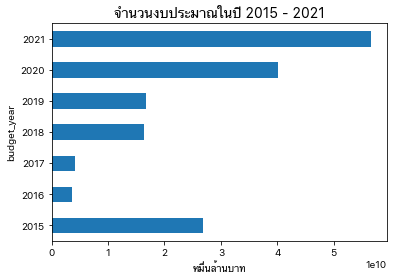

In [247]:
# Bar char of budget money between 2015-2021
df.groupby('budget_year')['project_money'].sum().plot(kind='barh')
plt.title("จำนวนงบประมาณในปี 2015 - 2021", weight='bold', fontsize=14)
plt.xlabel('หมื่นล้านบาท')
plt.show()

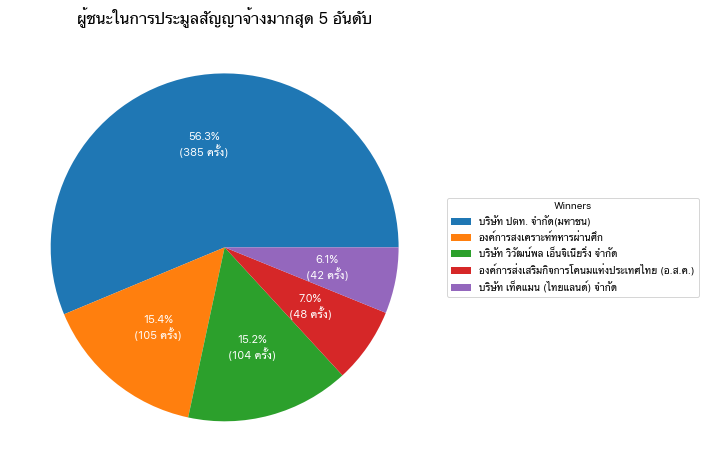

In [230]:
# top 10 winner
top_winner = df.groupby('winner')['winner'].count().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"), facecolor='white')
key = top_winner.keys()
data = top_winner

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} ครั้ง)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, key,
          title="Winners",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=11, weight="bold")
ax.set_title("ผู้ชนะในการประมูลสัญญาจ้างมากสุด 5 อันดับ", fontsize=16, weight="bold")
plt.show()

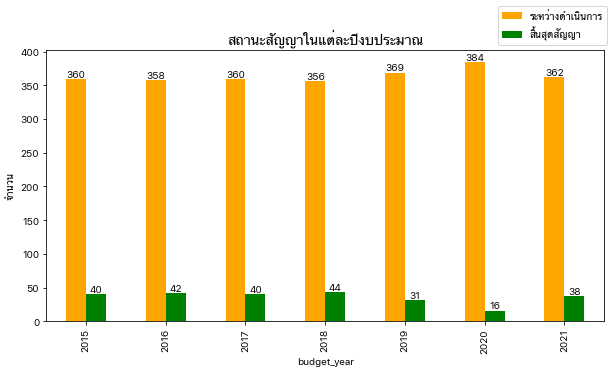

In [239]:
# plot project status
status = df.groupby(['budget_year', 'project_status']).size().unstack(fill_value=0)

ax = status.plot.bar(color=['orange', 'green'], figsize=(10,5))
plt.ylabel("จำนวน")
plt.title("สถานะสัญญาในแต่ละปีงบประมาณ", weight='bold', fontsize=14)
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
for container in ax.containers:
    ax.bar_label(container)
plt.show()